# Clase 19: Machine Learning

Explicar los conceptos y presentar un ejemplo en código de:

- Grupo 1: Slides 55 a 68
- Grupo 2: Slides 69 a 87
- Grupo 3: Slides 88 a 100

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


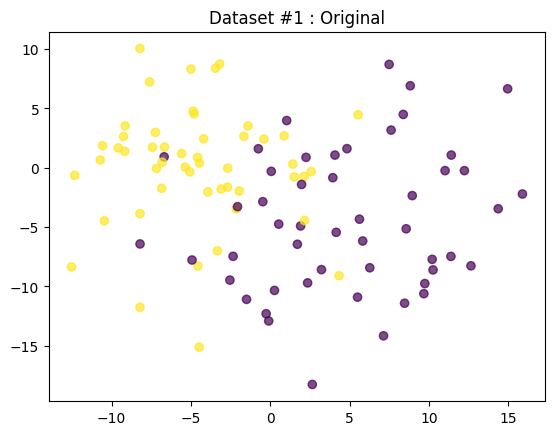

In [4]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

# KMeans

In [3]:
# Dataset #1 and two clusters / Instanciar el modelo
kmeans = KMeans(n_clusters=2,random_state=123, n_init='auto')

In [4]:
# Ajuste del modelo
kmeans.fit(X1)

KMeans(n_clusters=2, n_init='auto', random_state=123)

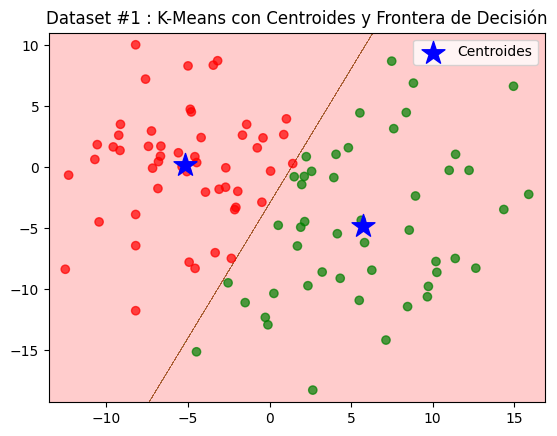

In [5]:
# Instanciar el modelo KMeans para 2 clusters
kmeans = KMeans(n_clusters=2, random_state=123, n_init='auto')
kmeans.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides como estrellas
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Centroides')

plt.title('Dataset #1 : K-Means con Centroides y Frontera de Decisión')
plt.legend()
plt.show()

# KMedoids

In [7]:
%pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00


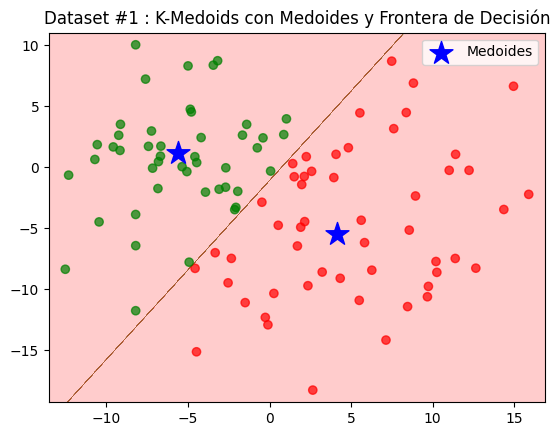

In [8]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo KMedoids para 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=123)
kmedoids.fit(X1)  # Ajuste del modelo

# Define una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = kmedoids.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(kmedoids.labels_).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los medoides como estrellas
medoids = kmedoids.cluster_centers_
plt.scatter(medoids[:, 0], medoids[:, 1], marker='*', s=300, c='blue', label='Medoides')

plt.title('Dataset #1 : K-Medoids con Medoides y Frontera de Decisión')
plt.legend()
plt.show()


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X1)  # Ajuste del modelo

# Definir una paleta de colores: 0~2 y -1 para ruido
myColors = {-1: 'gray', 0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = dbscan.fit_predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['gray', 'red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7)

plt.title('Dataset #1 : DBSCAN con Frontera de Decisión')
plt.show()


# Gaussian Mixture Model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instanciar el modelo GMM para 2 componentes
gmm = GaussianMixture(n_components=2, random_state=123)
gmm.fit(X1)  # Ajuste del modelo

# Definir una paleta de colores: 0~2
myColors = {0: 'red', 1: 'green'}

# Crear una cuadrícula de puntos en el espacio de datos
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecir la clasificación para cada punto en la cuadrícula
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión (línea divisoria)
plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'green'])

# Graficar los puntos con colores según el cluster asignado
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(gmm.predict(X1)).apply(lambda x: myColors[x]), alpha=0.7)

# Marcar los centroides (medios) como estrellas
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='blue', label='Medios')

plt.title('Dataset #1 : GMM con Medios y Frontera de Decisión')
plt.legend()
plt.show()
